In [23]:
import numpy as np
import math
import time
from scipy.stats import expon, uniform, chi2, norm
from scipy.stats import ksone, kstest, ks_2samp, chisquare  
import scipy.stats as sct

In [24]:
def get_sample(n, l):
    return np.random.exponential(scale=1.0/l, size=n)
    
def F_exp(u, l):
    return 1 - np.exp(- l*u)

def F_unif(u):
    if u>=1:
        return 1
    elif u<0:
        return 0
    else:
        return u

In [25]:
gamma = 0.05 
z_gamma = 1.36

In [70]:
def get_equal_intervals(r, h):
    ai = [0]
    s = 0
    for j in range(r):
        ai.append(s+h)
        s = s+h
    return ai

def get_v(X, xmax, r, h):
    v = [0 for i in range(r)]
    for x_i in X:
        if x_i == xmax:
            v[-1]+=1
        else:
            ind = int(x_i/h)
            v[ind]+=1
    return v

def check_Y_box(Y, n, gamma):
    print("\nChecking Y")
    z_gamma = norm.ppf(1-gamma, loc=0, scale=1) 
    r = int(n/2)
    ro = 2
    B = [F_unif(y_i) for y_i in Y]
    h = np.max(B)/r
    breakpoints = get_equal_intervals(r, h)
    v = get_v(B, r, h) #вектор частот
    k = np.sum( np.array(v) == 0)
    e_ro = np.exp(-ro)
    bound = r * e_ro + z_gamma * np.sqrt(r * e_ro * (1-(1+ro)*e_ro))
    if k < bound:
        print("Y рівномірна")
    else:
        print("Y нерівномірна")
        
        
"""     
def check_Y_box(Y, n, gamma):
    print("\nChecking Y")
    Z_gamma = norm.ppf(1-gamma, loc=0, scale=1) 
    r = int(n/2)
    ro = 2
    B = [F_unif(y_i) for y_i in Y]
    bmax = np.max(B)
    h = bmax/r
    breakpoints = get_equal_intervals(r, h)
    v = get_v(B, bmax, r, h) #вектор частот
    k = np.sum( np.array(v) == 0)
    e_ro = np.exp(-ro)
    bound = r * e_ro + Z_gamma * np.sqrt(r * e_ro * (1-(1+ro)*e_ro))
    if k < bound:
        print("Y IS uniform")
    else:
        print("Y NOT uniform")   """ 

'     \ndef check_Y_box(Y, n, gamma):\n    print("\nChecking Y")\n    Z_gamma = norm.ppf(1-gamma, loc=0, scale=1) \n    r = int(n/2)\n    ro = 2\n    B = [F_unif(y_i) for y_i in Y]\n    bmax = np.max(B)\n    h = bmax/r\n    breakpoints = get_equal_intervals(r, h)\n    v = get_v(B, bmax, r, h) #вектор частот\n    k = np.sum( np.array(v) == 0)\n    e_ro = np.exp(-ro)\n    bound = r * e_ro + Z_gamma * np.sqrt(r * e_ro * (1-(1+ro)*e_ro))\n    if k < bound:\n        print("Y IS uniform")\n    else:\n        print("Y NOT uniform")   '

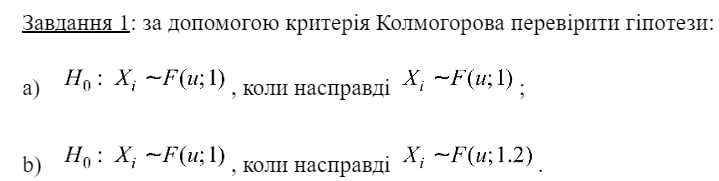

In [26]:
def checker_expon(X, l_theor, gamma):
    x = kstest(X, expon(scale=1.0/l_theor).cdf)
    if x.pvalue < gamma:
        return 'rejected'
    else:
        return 'accepted'

In [27]:
def Dn(X, n, l):
    X_ord = np.sort(X) 
    m = float('-inf')
    for k in range(n):
        F_k = F_exp(X_ord[k], l)
        m = max(m, F_k - (k-1)/n, k/n - F_k)  
    return math.sqrt(n)*m


def kolmogorov(X, n, l, gamma):
    D = Dn(X, n, l)
    print("z =", z_gamma)
    print("D=", D) #actually sqrt(n)*D
    if  D < z_gamma:
        print("Гіпотезу приймаємо")
        return True
    else:
        print("Гіпотезу відхиляємо")
        return False

In [72]:
def print_res(l_real, l_theor, func):
    for n in [1000, 10000, 100000]:
        X = get_sample(n, l_real)
        Y = F_exp(X, l_theor)
        print("N =", n)
        print(f'theoretical X ~ exp ({l_theor})')
        print(f'real        X ~ exp ({l_real})')
        func(X, n, l_theor, gamma)
        check_Y_box(Y, n, gamma)
        print()

In [73]:
print('---------TASK 1----------')
print('a) ')
print_res(1, 1, kolmogorov)
check_Y_box(Y, n, gamma)
print()
print('b)')
print_res(1.2, 1, kolmogorov)

---------TASK 1----------
a) 
N = 1000
theoretical X ~ exp (1)
real        X ~ exp (1)
z = 1.36
D= 0.6206369794553798
Гіпотезу приймаємо

Checking Y


TypeError: get_v() missing 1 required positional argument: 'h'

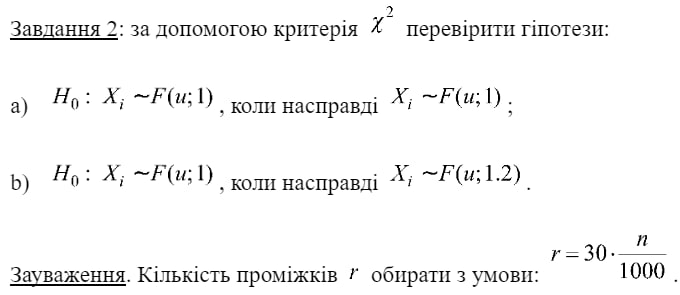

In [30]:
def getInd(x, points):
    for(i, edge) in enumerate(points):
        if (x > edge and x < points[i + 1]): return i
        
def chi_square (X, n, l, gamma):
    r = 3*n//100 # кількість інтервалів
    p = 1/r
    points = [sct.expon.ppf(i / r, scale = l) for i in range(0, r + 1)]
    v = np.zeros(r)

    for x_i in X:
        v[getInd(x_i, points)] += 1

    T = sum( (v[i] - n*p)**2 /p for i in range(r))/n
    z = sct.chi2.ppf(1 - gamma, r - 1)

    print(f' T = {T}')
    print(f' z = {z}')
    if T < z:
        print("Гіпотезу приймаємо")
        return True
    else:
        print("Гіпотезу відхиляємо")
        return False

In [31]:
print('---------TASK 2----------')
print('a) ')
print_res(1, 1, chi_square)
print()
print('b)')
print_res(1.2, 1, chi_square)

---------TASK 2----------
a) 
N = 1000
theoretical X ~ exp (1)
real        X ~ exp (1)
 T = 22.57999999999999
 z = 42.55696780429269
Гіпотезу приймаємо

N = 10000
theoretical X ~ exp (1)
real        X ~ exp (1)
 T = 300.80000000000047
 z = 340.3278503488595
Гіпотезу приймаємо

N = 100000
theoretical X ~ exp (1)
real        X ~ exp (1)
 T = 2873.0000000000787
 z = 3127.515431571307
Гіпотезу приймаємо


b)
N = 1000
theoretical X ~ exp (1)
real        X ~ exp (1.2)
 T = 74.9
 z = 42.55696780429269
Гіпотезу відхиляємо

N = 10000
theoretical X ~ exp (1)
real        X ~ exp (1.2)
 T = 567.5600000000015
 z = 340.3278503488595
Гіпотезу відхиляємо

N = 100000
theoretical X ~ exp (1)
real        X ~ exp (1.2)
 T = 5845.879999999831
 z = 3127.515431571307
Гіпотезу відхиляємо



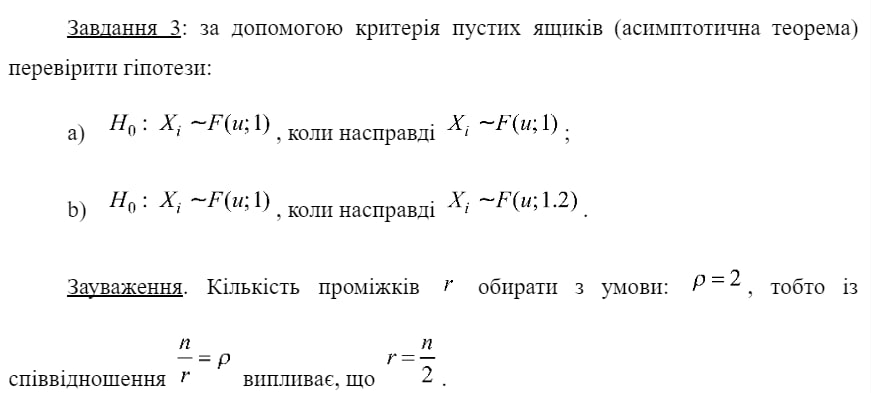

In [43]:
def empty_b (X, n, l, gamma):
    r = int(n/2) # кількість інтервалів
    ro = 2
    p = 1/r
    points = [sct.expon.ppf(i / r, scale = l) for i in range(0, r + 1)]
    v = np.zeros(r)

    for x_i in X:
        v[int(sct.expon.cdf(x_i, scale = l) * r)] += 1
    k = np.sum( np.array(v) == 0)
    z_gamma = norm.ppf(1-gamma, loc=0, scale=1) 
    z = r * np.exp(-ro) + z_gamma * np.sqrt(r *(np.exp(-ro)*(1-(1+ro)*np.exp(-ro))))
    print("k=", k)
    print("z=", z)
    if k < z:
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")

In [46]:
print('---------TASK 3----------')
print('a) ')
print_res(1, 1, empty_b)
print()
print('b)')
print_res(1.2, 1, empty_b)

---------TASK 3----------
a) 
N = 1000
theoretical X ~ exp (1)
real        X ~ exp (1)
k= 76
z= 78.09582983486621
Гіпотезу приймаємо

N = 10000
theoretical X ~ exp (1)
real        X ~ exp (1)
k= 688
z= 709.653242816322
Гіпотезу приймаємо

N = 100000
theoretical X ~ exp (1)
real        X ~ exp (1)
k= 6763
z= 6871.0460439962335
Гіпотезу приймаємо


b)
N = 1000
theoretical X ~ exp (1)
real        X ~ exp (1.2)
k= 68
z= 78.09582983486621
Гіпотезу приймаємо

N = 10000
theoretical X ~ exp (1)
real        X ~ exp (1.2)
k= 754
z= 709.653242816322
Гіпотезу відхиляємо

N = 100000
theoretical X ~ exp (1)
real        X ~ exp (1.2)
k= 7171
z= 6871.0460439962335
Гіпотезу відхиляємо



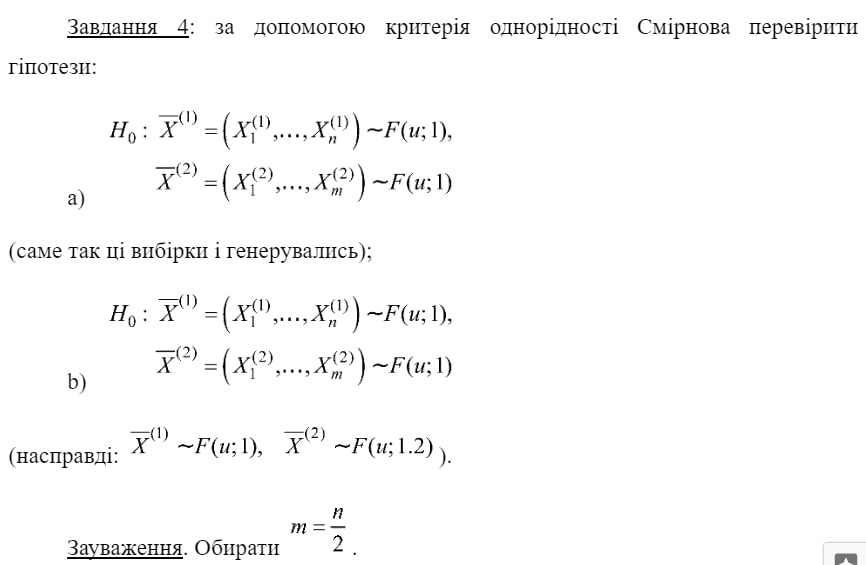

In [58]:
def cdf_n_Y(X_ord, n, Y_ord, m): # Емпірична ф-я розподілу
    cdf = [(np.sum(X_ord<=Y_ord[i])/n) for i in range(m)]
    return cdf

def D_2samp(X, Y, n, m):
    X_ord = np.sort(X) 
    Y_ord = np.sort(Y) 
    cdf = cdf_n_Y(X_ord, n, Y_ord, m)
    Dplus = np.max([(k/m - cdf[k]) for k in range(m)])
    Dminus = np.max([(cdf[k] - (k-1)/m)for k in range(m)])
    D = max(Dplus, Dminus)
    return D    


def kolmogorov_test_2samp(X, Y, n, gamma):
    m = int(n/2)
    z_gamma = 1.65
    print("Z_gamma =", z_gamma)
    D = D_2samp(X, Y, n, m)
    print("sqrt(n*m/(n+m)*D=", math.sqrt(n*m/(n+m)) * D)
    if math.sqrt(n*m/(n+m)) * D < z_gamma:
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")

In [61]:
print('---------TASK 4----------')
print('a) ')
for n in [1000, 10000, 100000]:
    m = int(n/2)
    print("n=", n, "m=", m)
    X = get_sample(n, 1)
    Y = get_sample(m, 1)
    kolmogorov_test_2samp(X, Y, n, gamma)
    print("\n")

print('b) ')
for n in [1000, 10000, 100000]:
    m = int(n/2)
    print("n=", n, "m=", m)
    X = get_sample(n, 1)
    Y = get_sample(m, 1.2)
    kolmogorov_test_2samp(X, Y, n, gamma)
    print("\n")

---------TASK 4----------
a) 
n= 1000 m= 500
Z_gamma = 1.65
sqrt(n*m/(n+m)*D= 1.0406728592598145
Гіпотезу приймаємо


n= 10000 m= 5000
Z_gamma = 1.65
sqrt(n*m/(n+m)*D= 0.8833459118601262
Гіпотезу приймаємо


n= 100000 m= 50000
Z_gamma = 1.65
sqrt(n*m/(n+m)*D= 1.0205896988179566
Гіпотезу приймаємо


b) 
n= 1000 m= 500
Z_gamma = 1.65
sqrt(n*m/(n+m)*D= 2.081345718519631
Гіпотезу відхиляємо


n= 10000 m= 5000
Z_gamma = 1.65
sqrt(n*m/(n+m)*D= 4.018357873559795
Гіпотезу відхиляємо


n= 100000 m= 50000
Z_gamma = 1.65
sqrt(n*m/(n+m)*D= 12.349317929883151
Гіпотезу відхиляємо


